In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [2]:
# calculate P(k=k1,k2,k3)
def calc_prob(ks: list, N=6, mu=0.5):
    res = 0
    for k in ks:
        res += binom.pmf(k, N, mu)
    return res

In [3]:
def calc_prob_abs(eps=0.1, N=6, mu=0.5):
    # P(|v-0.5| >eps) = P(|k - 3| > 6*eps)
    all_ks = np.arange(0, N+1)
    ks = all_ks[np.abs(all_ks - 3) > 6*eps]
    return calc_prob(ks, N, mu)  # P(|v-0.5| >eps)

In [4]:
def get_prob_max(eps=0.1, N=6, mu=0.5):
    P = calc_prob_abs(eps, N, mu)
    return 2*P - P**2

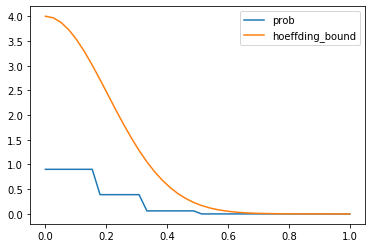

In [5]:
list_eps = np.linspace(0, 1, 40)
list_prob = [get_prob_max(eps, N=6, mu=0.5) for eps in list_eps]
plt.plot(list_eps, list_prob, label='prob')

hoeffding_bound = 2* 2 * np.exp(-2*6*list_eps**2)
plt.plot(list_eps, hoeffding_bound, label='hoeffding_bound')
plt.legend()